## 1.Importing Libraries

In [106]:
#Importing Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import datetime
import seaborn as sns
%matplotlib inline

## 2.Loading Data and Creating Dataframes 
We load the first dataset 'movie_gross_df' and create a dataframe named df1.

In [107]:
#load datasets 
#load movie_gross_df dataset  and assign it variable df1
df1=pd.read_csv('bom.movie_gross.csv')
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [108]:
# Verifying data types for each column
df1.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [109]:
# Verying data size by rows and columns in df1
df1.shape

(3387, 5)

## 3.Cleaning Data 
Clean data by , dropping unnecessary columns, checking for outliers, checking for duplicate values, handling missing data and checking for unique values.


In [110]:
# Checking for the sum of missing values for each column
df1.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

We find out that studio,domestic_gross and foreign_gross colums have missing values. 


In [111]:
# Check for duplicates in the dataset
df1.duplicated()
df1.duplicated().sum()

0

There's no duplicated data.

In [112]:
#checking for unique values 
df1.nunique()

title             3386
studio             257
domestic_gross    1797
foreign_gross     1204
year                 9
dtype: int64

In [113]:
#create a dataframe named studio_df
#dropping rows with missing values for studio column
studio_df = df1[df1['studio'].notna()].copy()
studio_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [114]:
# Checking for the sum of missing values for each column in studio dataframe
studio_df.isna().sum()

title                0
studio               0
domestic_gross      26
foreign_gross     1349
year                 0
dtype: int64

In [115]:
#Filling missing values in domestic_gross to 0
studio_df['domestic_gross'] = studio_df['domestic_gross'].fillna(0)

studio_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   2033 non-null   object 
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.5+ KB


In [116]:
#Filling missing values in foreign_gross to 0
studio_df['foreign_gross'] =pd.to_numeric(studio_df['foreign_gross'],errors='coerce')
studio_df['foreign_gross'] = studio_df['foreign_gross'].fillna(0)
studio_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


## 4.Data Analysis and Visualization


In [117]:
#what was the most used produced movie
df1['title'].value_counts().idxmax()

'Bluebeard'

In [118]:
#no of movies produced as per title
title_counts = df1['title'].value_counts()
title_counts

Bluebeard                             2
San Andreas                           1
Term Life                             1
In Secret                             1
Tracks (2014)                         1
                                     ..
Mr. Turner                            1
The Disappearance of Eleanor Rigby    1
The Players                           1
The Other Woman (2014)                1
Suspiria                              1
Name: title, Length: 3386, dtype: int64

In [119]:
#which is the most used studio
df1['studio'].value_counts().idxmax()

'IFC'

In [120]:
#no of studios used 
studio_counts = df1['studio'].value_counts()
studio_counts

IFC           166
Uni.          147
WB            140
Magn.         136
Fox           136
             ... 
MSF             1
NAV             1
MUBI            1
E1              1
Synergetic      1
Name: studio, Length: 257, dtype: int64

In [121]:
#Create a new column named total_gross which is a sum of domestic and foreign gross.
studio_df['total_gross'] = studio_df['domestic_gross'] + studio_df['foreign_gross']
studio_df

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018,6.200000e+03
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018,4.800000e+03
3384,El Pacto,Sony,2500.0,0.0,2018,2.500000e+03
3385,The Swan,Synergetic,2400.0,0.0,2018,2.400000e+03


In [122]:
movie_counts_per_year = studio_df.groupby('year').size()

# Calculating the percentage decline per year
percentage_decline_per_year = (movie_counts_per_year.pct_change() * 100).round(2)

# Printing the result
print("Percentage decline per year:")
print(percentage_decline_per_year)

Percentage decline per year:
year
2010      NaN
2011    21.71
2012     0.25
2013   -12.28
2014    12.57
2015    14.21
2016    -3.11
2017   -26.61
2018    -3.75
dtype: float64


There is a significant decline in the number of movies produced between 2015 to 2018 with 2016 to 2017 having the highest decline.

## We create a histogram to visualize total number of movies per annum.

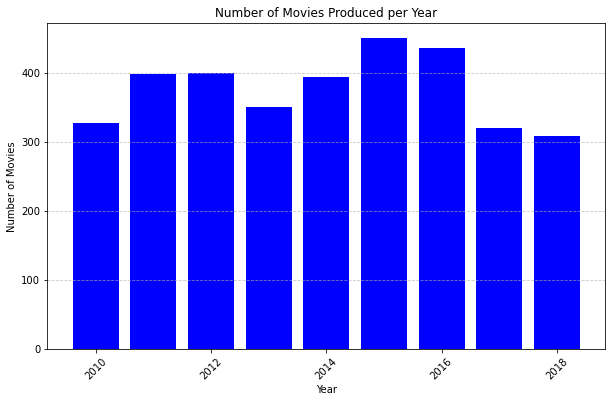

In [123]:
title_counts = studio_df.groupby(studio_df['year']).size()
plt.figure(figsize=(10, 6))
plt.bar(title_counts.index, title_counts.values, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Produced per Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## We'd like to get more information regarding the number of movies produced in relation to studio used.

In [124]:
#drop columns 'domestic_gross','foreign_gross', 'year
#keep title, studio, total_gross
studio_df = studio_df.drop(columns=['domestic_gross','foreign_gross', 'year'])
studio_df.head()

,title,studio,total_gross
0,Toy Story 3,BV,1.067000e+09
1,Alice in Wonderland (2010),BV,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,9.603000e+08
3,Inception,WB,8.283000e+08
4,Shrek Forever After,P/DW,7.526000e+08


In [125]:
# Top 10 studios 
studio_counts = studio_df['studio'].value_counts()
studio_counts.head(10)

IFC      166
Uni.     147
WB       140
Magn.    136
Fox      136
SPC      123
Sony     110
BV       106
LGF      103
Par.     101
Name: studio, dtype: int64

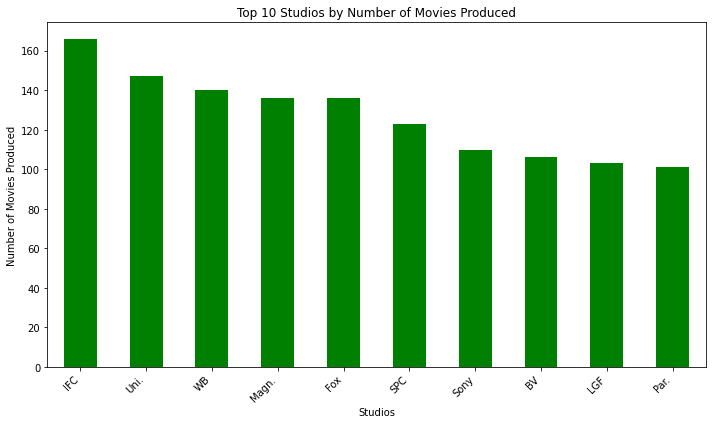

In [126]:
plt.figure(figsize=(10, 6))
studio_counts.head(10).plot(kind='bar', color='g')
plt.xlabel('Studios')
plt.ylabel('Number of Movies Produced')
plt.title('Top 10 Studios by Number of Movies Produced')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## We also check on the top 10 performance of studios with high mean gross income.

In [127]:
#sort the studios by mean_Gross -- to display top 10 studios based on mean gross income
studio_df0 = studio_df.groupby(['studio'])
mean_gross = studio_df0['total_gross'].mean()
mean_gross.sort_values(ascending=False, inplace=True)
mean_gross = mean_gross[:10,]
mean_gross

studio
HC          8.703000e+08
P/DW        5.076500e+08
BV          4.171027e+08
GrtIndia    2.542000e+08
WB (NL)     2.296600e+08
Fox         2.279806e+08
WB          2.202568e+08
Sony        2.036822e+08
Uni.        2.024297e+08
Par.        1.935570e+08
Name: total_gross, dtype: float64

## We create a bar plot to show average gross income for top 10 studios with highest gross.


c:\Users\Vero\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


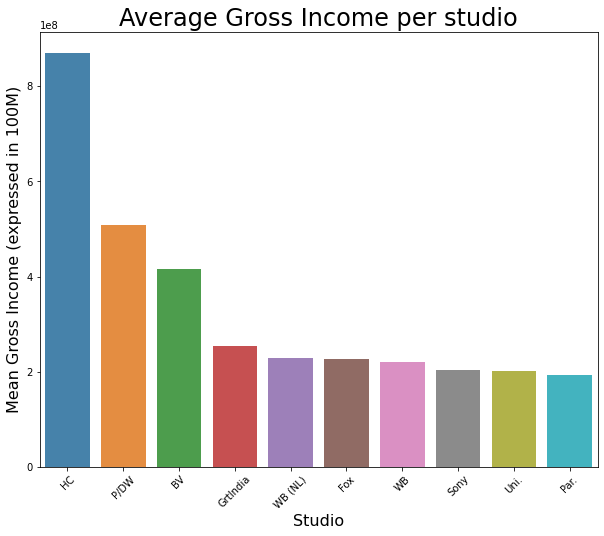

In [128]:
#mean_gross per studio
plt.figure(figsize=(10,8))
sns.barplot(mean_gross.index, mean_gross.values, alpha=0.9)
plt.title('Average Gross Income per studio', fontsize=24)
plt.ylabel('Mean Gross Income (expressed in 100M)', fontsize=16)#mean gross expressed in hundreds of million 
plt.xlabel('Studio', fontsize=16) 
plt.xticks(rotation=45)
plt.show()

This shows that highest number of movies produced in a studio doesn't mean that you'll get top income as compared to those producing lesser. We check on the correlation of the same.

In [129]:
correlation = mean_gross.corr(studio_counts)
correlation

-0.6124805208269873

A negative correlation of 0.6 indicates that a higher number of movies produced, does not imply higher revenue. 

## We load the second dataset 'tn.movie_budgets' and create a dataframe named df2.


In [130]:
df2=pd.read_csv('tn.movie_budgets.csv')
df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [131]:
df2.shape

(5782, 6)

In [132]:
#getting information and descriptive statistics from the second datasets 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [133]:
#checking for missing data in df2
df2.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

We don't have any missing values in the second dataset.

In [134]:
#Remove the dollar signs from each column with dollar sign.
columns_change=['production_budget','domestic_gross','worldwide_gross']
for d in columns_change:
    df2[d] = df2[d].str.strip('$')
    df2[d] = df2[d].replace(',','', regex=True)


df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [135]:
#converting datatypes of production_budget,domestic_gross and worldwide_gross to integers
df2['production_budget'] =pd.to_numeric(df2['production_budget'],errors='coerce')
df2['domestic_gross'] =pd.to_numeric(df2['domestic_gross'],errors='coerce')
df2['worldwide_gross'] =pd.to_numeric(df2['worldwide_gross'],errors='coerce')
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [136]:
#Create a dataframe name movie_profit and find the profit made from each movie
movie_profit=df2['worldwide_gross']-df2['production_budget']

In [137]:
#make copy of dataframe movie_profit
movie_profit_df = df2.copy()
#Make column profit in millions 
movie_profit_df['Profit In Millions'] = (movie_profit_df['worldwide_gross'] - movie_profit_df['production_budget'] )/ 1000000
movie_profit_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profit In Millions
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351.345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635.063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200.237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072.413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999.721747
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-0.007000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,0.234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-0.003662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-0.001400


In [138]:
renamed_df = movie_profit_df.rename(columns={'movie':'title', 'release_date':'year'})

# Convert column to datetime
renamed_df['year'] = pd.to_datetime(renamed_df['year'], format='%b %d, %Y')

# Extract month from datetime
renamed_df['month'] = renamed_df['year'].dt.month

# Display the DataFrame
renamed_df.head()

,id,year,title,production_budget,domestic_gross,worldwide_gross,Profit In Millions,month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351.345279,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635.063875,5
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200.237650,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072.413963,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999.721747,12


We'd like to check the best time of the year to produce movies.

In [139]:
# Group data by month and calculate total profits for each month
monthly_profits = renamed_df.groupby('month')['Profit In Millions'].sum()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

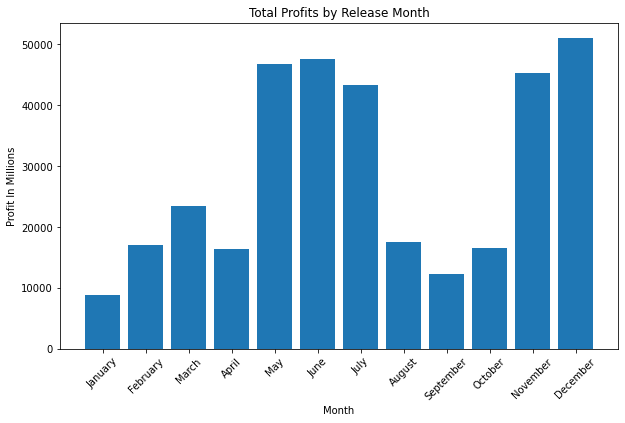

In [140]:
import calendar
import matplotlib.pyplot as plt

# Group data by month and calculate total profits for each month
monthly_profits = renamed_df.groupby('month')['Profit In Millions'].sum()

# Get month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(month_names, monthly_profits)  # Using monthly_profits here
plt.title('Total Profits by Release Month')
plt.xlabel('Month')
plt.ylabel('Profit In Millions')
plt.xticks(rotation=45)

We find that Movies released in December made more profits as compared to other months. 

## We load the third dataset 'im.db.sqlite' and create a dataframe named df3.

In [141]:
#connecting to the database
conn = sqlite3.connect('im.db')
cur = conn.cursor()

In [142]:
#checking for tables in our data frames
df3 = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
df3

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [143]:
#selecting all from movie_rating table
q="select * from movie_ratings";
df3=pd.read_sql(q,conn)
df3

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [144]:
#selecting all from movie_basics table
q="select * from movie_basics";
df3=pd.read_sql(q,conn)
df3

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [145]:
#Join movie_basics and movie_ratings using movie_id
q= """SELECT *
        FROM movie_basics
        JOIN movie_ratings
             USING(movie_id) ;"""

In [146]:
df3=pd.read_sql(q,conn)
df3


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [147]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


The third data frame(df3) has no missing data.

In [148]:
#checking for missing values in genres column
df3['genres'].isna().sum()


804

In [149]:
#dropping the missing data from genre column
df3 = df3.dropna(subset = ['genres'])

In [150]:
# set 'genres' column to dtype to str
#df3['genres'] = [str(i) for i in df3.genres]
df3.loc[:, 'genres'] = df3['genres'].astype(str)

c:\Users\Vero\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [179]:
#rename the primary_title column to movie
df3.rename(columns={'primary_title':'movie'}, inplace=True)

c:\Users\Vero\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [152]:
#remove unnecesary columns from the dataframe.
rating_df = df3.drop(columns=['movie_id', 'runtime_minutes', 'original_title'])

In [180]:
genres_df = rating_df.set_index('movie').genres.str.split(',',
            expand=True).stack().reset_index(level=1, 
            drop=True).to_frame('genres')

In [154]:
genres_df.info()
genres_df.head()
%store genres_df

<class 'pandas.core.frame.DataFrame'>
Index: 128490 entries, Sunghursh to Drømmeland
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   genres  128490 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB
Stored 'genres_df' (DataFrame)


In [155]:
#checking summary statiscs of the rating dataframe
rating_df.describe()

,start_year,averagerating,numvotes
count,73052.000000,73052.000000,7.305200e+04
mean,2014.281430,6.330930,3.562173e+03
std,2.615288,1.474699,3.045804e+04
min,2010.000000,1.000000,5.000000e+00
25%,2012.000000,5.500000,1.400000e+01
50%,2014.000000,6.500000,5.000000e+01
75%,2017.000000,7.400000,2.890000e+02
max,2019.000000,10.000000,1.841066e+06


## Data Visualization

c:\Users\Vero\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


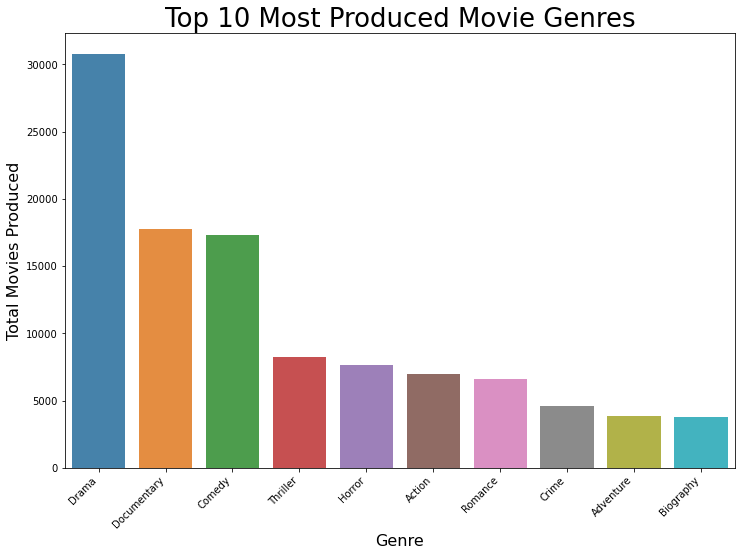

In [156]:
# We plot the number of movies based on genres
genres_count = genres_df['genres'].value_counts()
genres_count = genres_count[:10,]
plt.figure(figsize=(12,8))
sns.barplot(genres_count.index, genres_count.values, alpha=0.9)
plt.title('Top 10 Most Produced Movie Genres', fontsize=26)
plt.ylabel('Total Movies Produced', fontsize=16)
plt.xlabel('Genre', fontsize=16) 
plt.xticks(rotation=45, ha='right')
plt.show()

This shows that drama has the highest number of movies.

## Merging df2 to df3.

In [157]:
genre_costs = pd.merge(genres_df, df2, on='movie', how='right')
genre_costs.info()
genre_costs.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10042 entries, 0 to 10041
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              10042 non-null  object
 1   genres             6444 non-null   object
 2   id                 10042 non-null  int64 
 3   release_date       10042 non-null  object
 4   production_budget  10042 non-null  int64 
 5   domestic_gross     10042 non-null  int64 
 6   worldwide_gross    10042 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 627.6+ KB


,movie,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
0,Avatar,Horror,1,"Dec 18, 2009",425000000,760507625,2776345279
1,Pirates of the Caribbean: On Stranger Tides,Action,2,"May 20, 2011",410600000,241063875,1045663875
2,Pirates of the Caribbean: On Stranger Tides,Adventure,2,"May 20, 2011",410600000,241063875,1045663875
3,Pirates of the Caribbean: On Stranger Tides,Fantasy,2,"May 20, 2011",410600000,241063875,1045663875
4,Dark Phoenix,Action,3,"Jun 7, 2019",350000000,42762350,149762350


In [158]:
#we find gross profit of each movie
genre_costs['gross_profit'] = genre_costs['worldwide_gross'] - genre_costs['production_budget']

In [167]:
#replace the values 0 with one in worldwide_gross column
genre_costs['worldwide_gross'].replace(0, 1)

0        2776345279
1        1045663875
2        1045663875
3        1045663875
4         149762350
            ...    
10037          1338
10038             1
10039             1
10040             1
10041        181041
Name: worldwide_gross, Length: 10042, dtype: int64

In [174]:
#group the DataFrame genre_costs by the values in the 'genres' column
genre_grp = genre_costs.groupby(genre_costs.genres)

In [168]:
#we get average budget per genre
mean_budget = genre_grp['production_budget'].mean()
mean_budget.sort_values(ascending=False, inplace=True)

c:\Users\Vero\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


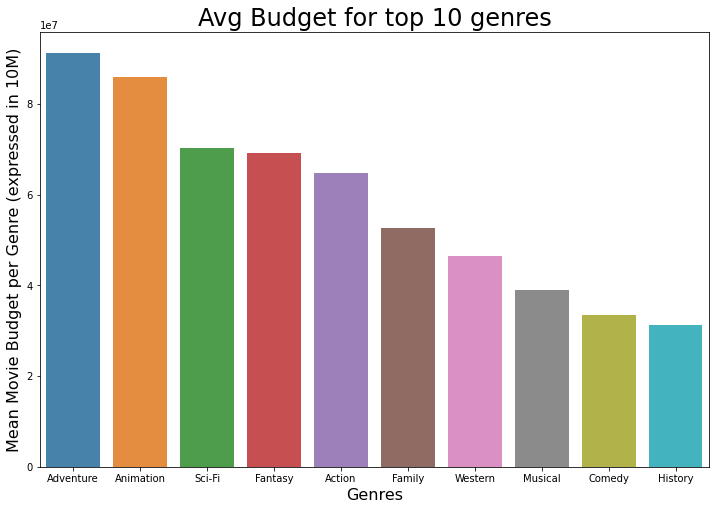

In [175]:
# Budget per genre 
mean_budget = mean_budget[:10,]
plt.figure(figsize=(12,8))
sns.barplot(mean_budget.index, mean_budget.values, alpha=0.9)
plt.title('Avg Budget for top 10 genres', fontsize=24)
plt.ylabel('Mean Movie Budget per Genre (expressed in 10M)', fontsize=16)
plt.xlabel('Genres', fontsize=16) 
plt.show()

In [176]:
#average profit per genre
mean_profit = genre_grp['gross_profit'].mean()
mean_profit.sort_values(ascending=False, inplace=True)

c:\Users\Vero\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


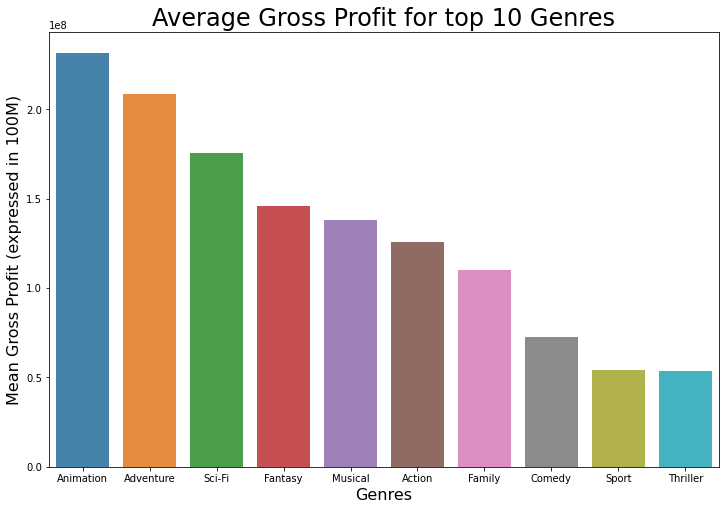

In [177]:
mean_profit = mean_profit[:10,]
plt.figure(figsize=(12,8))
sns.barplot(mean_profit.index, mean_profit.values, alpha=0.9)
plt.title('Average Gross Profit for top 10 Genres', fontsize=24)
plt.ylabel('Mean Gross Profit (expressed in 100M)', fontsize=16)
plt.xlabel('Genres', fontsize=16) 
plt.show()

In [165]:
correlation1 = mean_profit.corr(mean_budget)
correlation1

0.879879284795459

There is a strong positive correlation between average gross profit and average budget per genre.

c:\Users\Vero\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


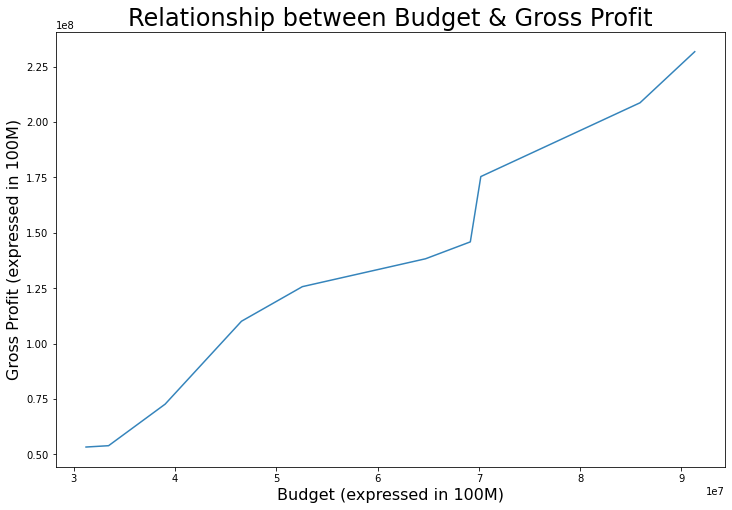

In [178]:
plt.figure(figsize=(12,8))
sns.lineplot(mean_budget.values, mean_profit.values, alpha=0.9)
plt.title('Relationship between Budget & Gross Profit', fontsize=24)
plt.ylabel('Gross Profit (expressed in 100M)', fontsize=16)
plt.xlabel('Budget (expressed in 100M)', fontsize=16) 
plt.show()

## Recommendations

## 1. From our first dataset, we found out that December was the most viable time and period to release  your movie hence Microsoft should consider that.


## 2. Using the studios data we found making many movies does not necessarily mean making more money hence production budget and gross incomes should be the key guide on determining returns of your movie.

## 3. Drama was the most produced genre hence I would advise Microsoft to go for it but allocate more production resources to it for it to give good profits.

## 4.Animation and adventure movies are the most profitable. This shows the more you allocate for a certain movie the higher the returns. Microsoft should allocate more proction budget on animation and adventure movies.